In [1]:
import gspread
import pandas as pd
import pymysql.cursors

In [53]:
service_account = gspread.service_account(filename="/Users/timal/.config/gspread/service_account.json")
sheet = service_account.open("CHPT")
work_sheet = sheet.worksheet("CHPT")
all_values = work_sheet.get_all_values()
df = pd.DataFrame(all_values)
df

,0,1,2,3,4,5,6
0,Date,Open,High,Low,Close,Adj Close,Volume
1,2019-09-16,9.65,9.85,9.65,9.85,9.85,1700
2,2019-09-23,9.85,9.85,9.66,9.66,9.66,25800
3,2019-09-30,9.685,9.71,9.685,9.71,9.71,800
4,2019-10-07,9.68,9.7,9.63,9.7,9.7,767400
...,...,...,...,...,...,...,...
141,2022-05-23,10.92,13.49,10.21,13.45,13.45,47308000
142,2022-05-30,13.74,14.965,12.16,14.57,14.57,67589500
143,2022-06-06,14.92,16.16,14.31,14.39,14.39,55307800
144,2022-06-13,13.62,14.25,11.85,14.03,14.03,58502800


In [54]:
new_columns = df.iloc[0]
df = df[1:]
df.columns = new_columns

In [55]:
type(df)
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

In [56]:
type(df)

pandas.core.frame.DataFrame

In [57]:
df[['adj_close']] = df[['adj_close']].apply(pd.to_numeric)

/var/folders/ly/b0d5ymx54rd755r8d506sd000000gn/T/ipykernel_60253/1187042892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['adj_close']] = df[['adj_close']].apply(pd.to_numeric)


In [58]:
df[['volume']] = df[['volume']].apply(pd.to_numeric)

/var/folders/ly/b0d5ymx54rd755r8d506sd000000gn/T/ipykernel_60253/3078156527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['volume']] = df[['volume']].apply(pd.to_numeric)


In [59]:
df

,date,open,high,low,close,adj_close,volume
1,2019-09-16,9.65,9.85,9.65,9.85,9.85,1700
2,2019-09-23,9.85,9.85,9.66,9.66,9.66,25800
3,2019-09-30,9.685,9.71,9.685,9.71,9.71,800
4,2019-10-07,9.68,9.7,9.63,9.7,9.70,767400
5,2019-10-14,9.7,9.75,9.7,9.71,9.71,180000
...,...,...,...,...,...,...,...
141,2022-05-23,10.92,13.49,10.21,13.45,13.45,47308000
142,2022-05-30,13.74,14.965,12.16,14.57,14.57,67589500
143,2022-06-06,14.92,16.16,14.31,14.39,14.39,55307800
144,2022-06-13,13.62,14.25,11.85,14.03,14.03,58502800


In [60]:
rate_of_return = (df.adj_close - df.adj_close.shift(1)) / df.adj_close.shift(1)

In [61]:
type(rate_of_return)

pandas.core.series.Series

In [62]:
rate_of_return.name = 'weekly_returns'

In [63]:
type(df)

pandas.core.frame.DataFrame

In [64]:
# clean_df = df.merge(rate_of_return, left_index=True, right_index=True)
# clean_df

In [65]:
df['weekly_returns'] = rate_of_return
df

/var/folders/ly/b0d5ymx54rd755r8d506sd000000gn/T/ipykernel_60253/1146535195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekly_returns'] = rate_of_return


,date,open,high,low,close,adj_close,volume,weekly_returns
1,2019-09-16,9.65,9.85,9.65,9.85,9.85,1700,NaN
2,2019-09-23,9.85,9.85,9.66,9.66,9.66,25800,-0.019289
3,2019-09-30,9.685,9.71,9.685,9.71,9.71,800,0.005176
4,2019-10-07,9.68,9.7,9.63,9.7,9.70,767400,-0.001030
5,2019-10-14,9.7,9.75,9.7,9.71,9.71,180000,0.001031
...,...,...,...,...,...,...,...,...
141,2022-05-23,10.92,13.49,10.21,13.45,13.45,47308000,0.220508
142,2022-05-30,13.74,14.965,12.16,14.57,14.57,67589500,0.083271
143,2022-06-06,14.92,16.16,14.31,14.39,14.39,55307800,-0.012354
144,2022-06-13,13.62,14.25,11.85,14.03,14.03,58502800,-0.025017


In [66]:
df['weekly_returns'].describe()

count    144.000000
mean       0.007750
std        0.108604
min       -0.194575
25%       -0.039568
50%        0.000000
75%        0.022016
max        0.580665
Name: weekly_returns, dtype: float64

In [67]:
average = df['weekly_returns'].mean() * 100
std_dev = df['weekly_returns'].std() * 100

In [68]:
average

0.7750401134328276

In [69]:
std_dev

10.860399712064178

array([[<AxesSubplot:title={'center':'weekly_returns'}>]], dtype=object)

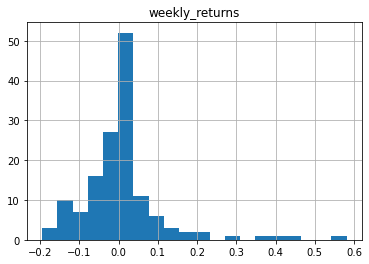

In [74]:
df.hist(column='weekly_returns', bins=20)

/var/folders/ly/b0d5ymx54rd755r8d506sd000000gn/T/ipykernel_60253/1676081427.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df.date)


<AxesSubplot:xlabel='date'>

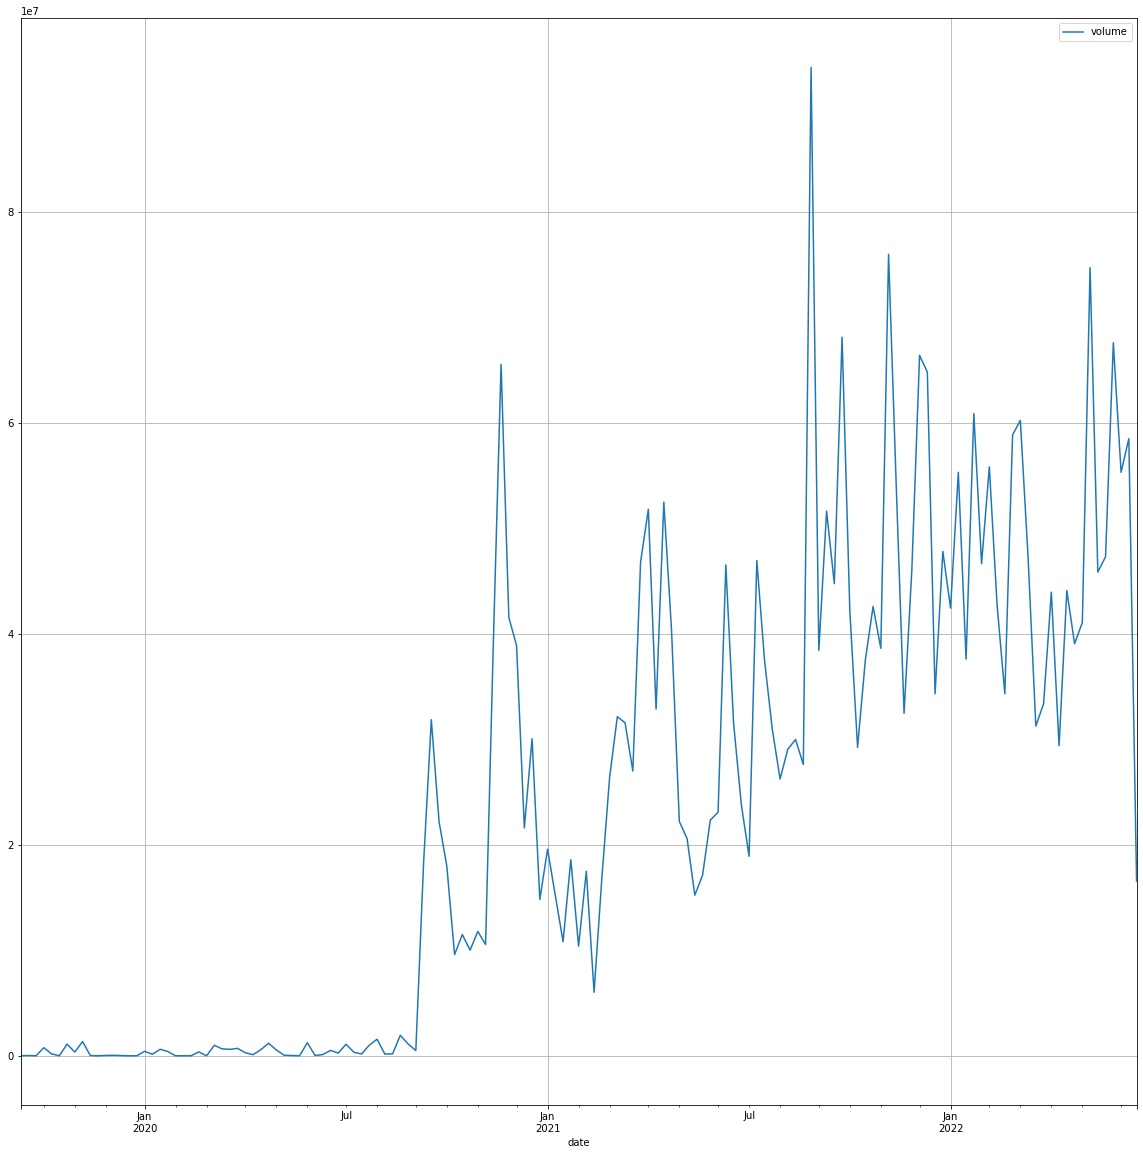

In [77]:
df['date'] = pd.to_datetime(df.date)
df.plot(x='date', y='volume', figsize=(20,20), grid=True)

In [78]:
df['volume'].describe()

count    1.450000e+02
mean     2.359475e+07
std      2.240753e+07
min      0.000000e+00
25%      5.746000e+05
50%      2.058920e+07
75%      4.105950e+07
max      9.368880e+07
Name: volume, dtype: float64

array([[<AxesSubplot:title={'center':'volume'}>]], dtype=object)

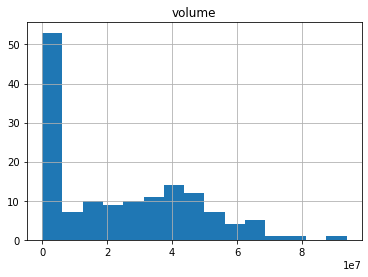

In [80]:
df.hist(column='volume', bins=15)